In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.layers import Embedding
import joblib


nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Uzair\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Uzair\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Uzair\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
data = pd.read_csv(r"C:\Users\Uzair\Downloads\Modified_IMDBDataset2.csv", encoding='latin1')

In [7]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49641 entries, 0 to 49640
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49641 non-null  object
 1   sentiment  49640 non-null  object
dtypes: object(2)
memory usage: 775.8+ KB


In [9]:
# Function to remove HTML tags from a string
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Apply the function to remove HTML tags from the 'text' column
data['review'] = data['review'].apply(remove_html_tags)

In [10]:
positive = data[data["sentiment"]=="positive"]

negative = data[data["sentiment"]=="negative"]

In [11]:
positive.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive


In [12]:
negative.head()

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative


In [13]:
text = " ".join(cat.split()[1] for cat in positive.review)

In [14]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

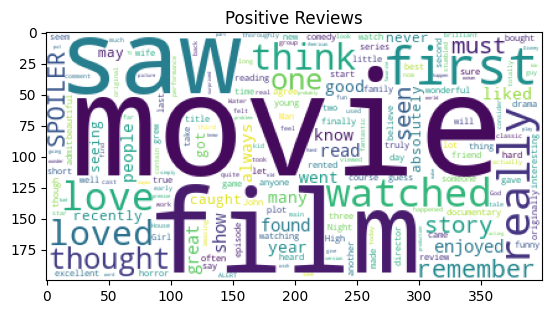

In [15]:
plt.title("Positive Reviews")
plt.imshow(word_cloud)


In [16]:
text = " ".join(cat.split()[1] for cat in negative.review)

In [17]:
word_cloud_neg = WordCloud(collocations = False, background_color = 'white').generate(text)

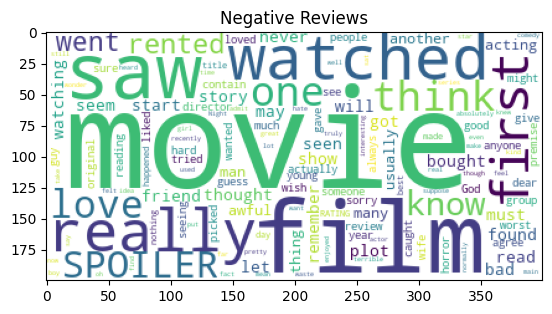

In [18]:
plt.title("Negative Reviews")
plt.imshow(word_cloud_neg)


In [19]:
# Stop Words Removal

In [20]:
def pre_processing(text):
    remove = re.sub(r'[^a-zA-Z\s]','', text)
    tokens = word_tokenize(remove.lower())
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(words)

In [21]:
pre_processing('I am Saim. I am studying A2')

'saim studying'

In [22]:
data['processed_review'] = data['review'].apply(pre_processing)

In [23]:
data = data[(data['sentiment'] == 'positive') | (data['sentiment'] == 'negative')]

In [24]:
data.head(5)

,review,sentiment,processed_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. The filming tec...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [25]:
vectorizer = TfidfVectorizer()

In [26]:
x = vectorizer.fit_transform(data['processed_review'])

In [27]:
x

<49639x203156 sparse matrix of type '<class 'numpy.float64'>'
	with 4764947 stored elements in Compressed Sparse Row format>

In [28]:
label_encoder = LabelEncoder()

In [29]:
data['encoded_sentiment'] = label_encoder.fit_transform(data['sentiment'])

In [30]:
data.head()

,review,sentiment,processed_review,encoded_sentiment
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...,1
1,A wonderful little production. The filming tec...,positive,wonderful little production filming technique ...,1
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,1
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,1


In [31]:
y = data['encoded_sentiment']

In [32]:
data['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=2, test_size=0.2, stratify=y)

In [34]:
X_train.shape

(39711, 203156)

In [35]:
Y_train.shape

(39711,)

In [36]:
model = SVC()

In [37]:
model.fit(X_train, Y_train)

SVC()

In [38]:
pred = model.predict(X_test)
acc_score = accuracy_score(Y_test, pred)
print('Accuracy: ', acc_score)

Accuracy:  0.8980660757453667


In [39]:
confusion_metrics = confusion_matrix(Y_test, pred)
print('Confusion Metrics: ', confusion_metrics)

Confusion Metrics:  [[4390  575]
 [ 437 4526]]


In [41]:
joblib.dump(model, r'C:\Users\Uzair\Downloads\sentiment_analysis.pkl')

['C:\\Users\\Uzair\\Downloads\\sentiment_analysis.pkl']

In [48]:
def test(text):
    processed_text = pre_processing(text)
    
    if not hasattr(vectorizer, 'idf_'):  # Check if vectorizer is fitted
        vectorizer.fit_transform(data['processed_review'])  # Fit vectorizer if not fitted
        
    vector = vectorizer.transform([processed_text])  # Transform the processed text
    
    prediction = model.predict(vector)
    
    if prediction[0] == 0:
        print('Review: Negative')
    else:
        print('Review: Positive')


In [49]:
test('I had a terrible experience at this restaurant. The staff was rude and unhelpful, and the food was mediocre at best. I would not recommend this place to anyone.')

Review: Negative
